<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


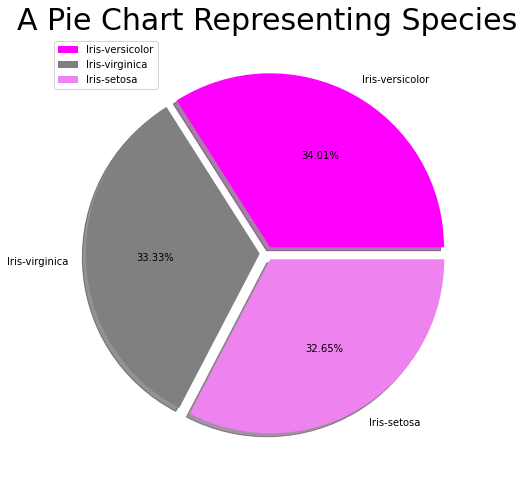

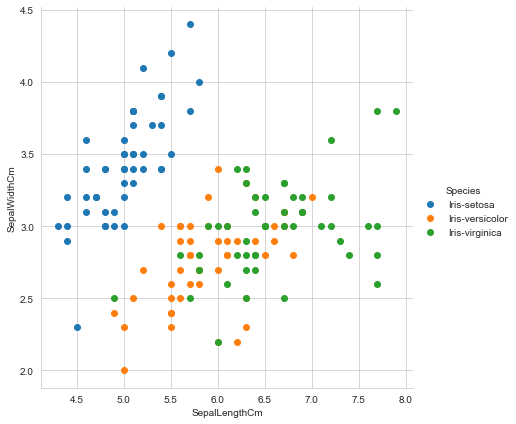

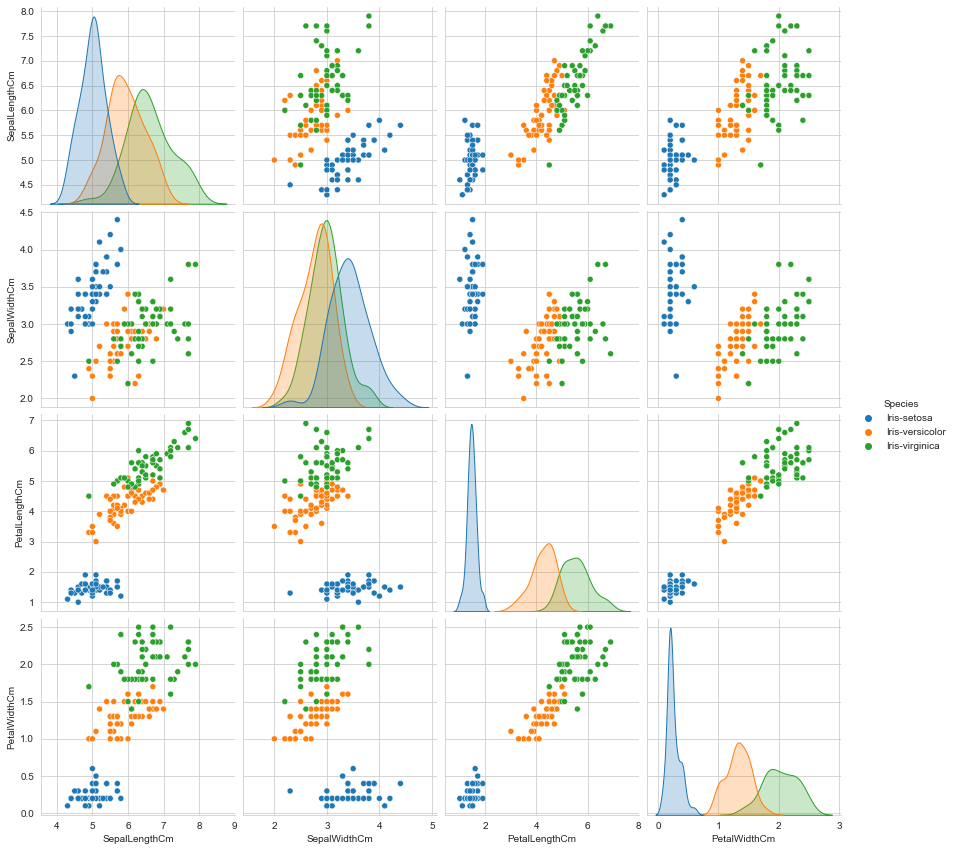

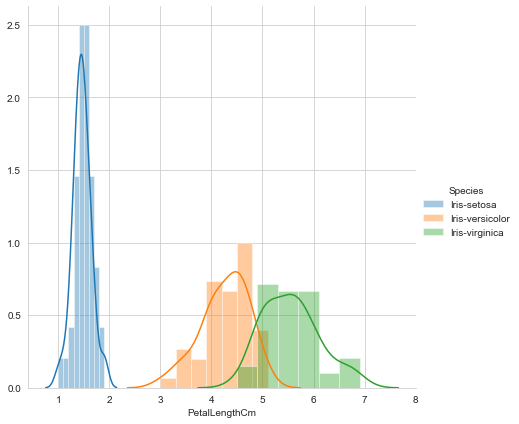

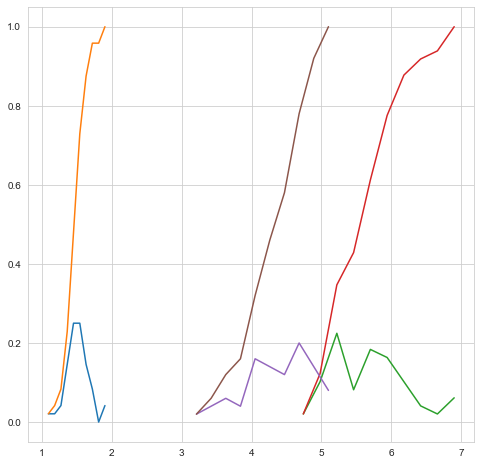

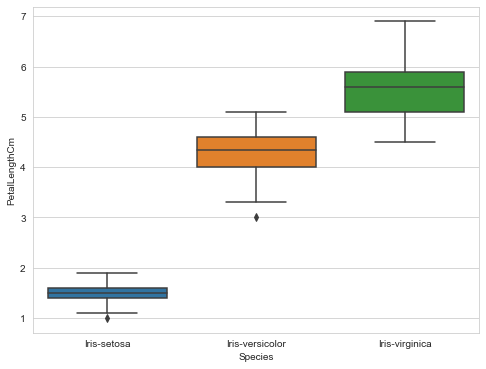

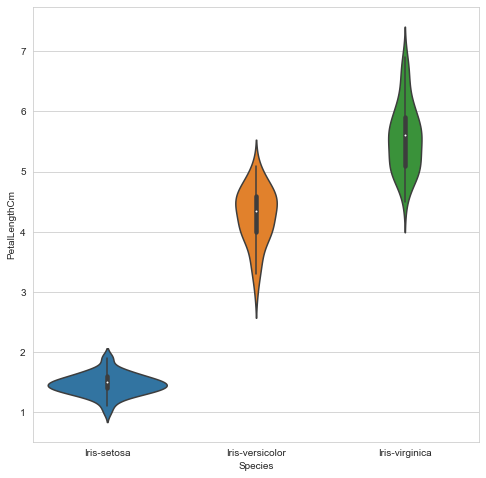

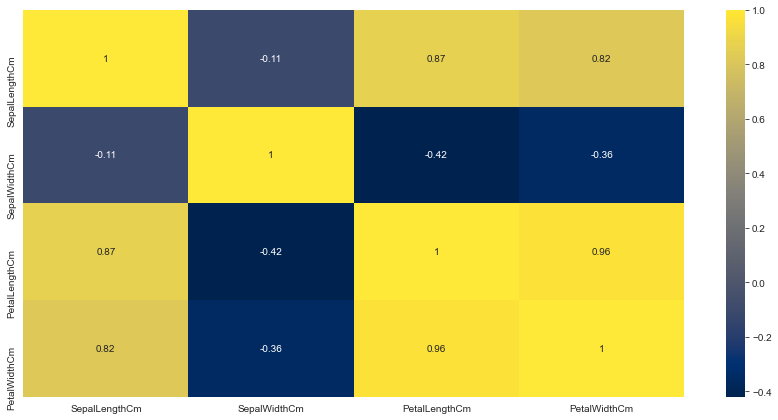

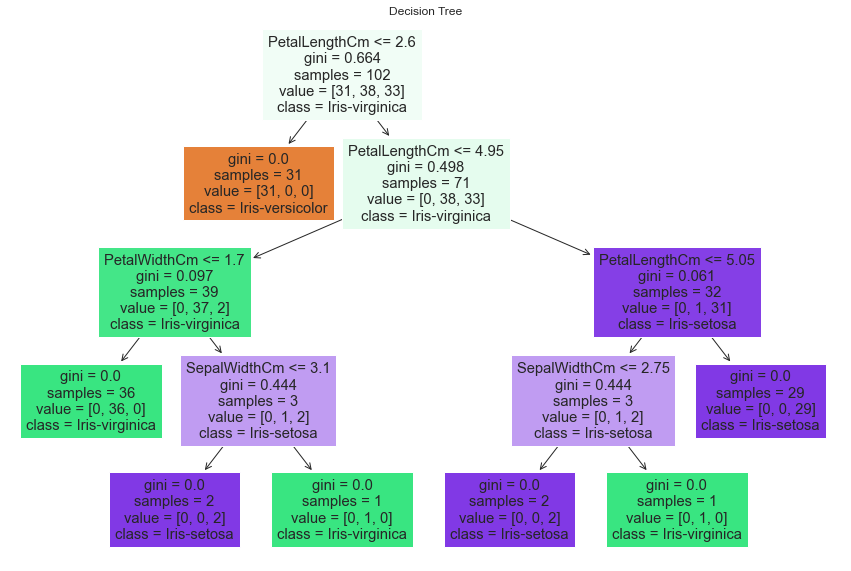

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r'Iris.csv')
df
df.drop('Id',axis=1,inplace=True)
df.shape
df.drop_duplicates(inplace=True)
df.shape
df.isnull().sum()
df.info()
df.describe()
df['Species'].value_counts()
# plotting a pie chart
size = [50,49,48]
labels = "Iris-versicolor", "Iris-virginica","Iris-setosa"
colors = ['magenta', 'grey','violet']
explode = [0.04,0.04,0.04]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Species', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", size=3);
plt.show()
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend()
plt.show()
iris_setosa = df.loc[df["Species"] == "Iris-setosa"];
iris_virginica = df.loc[df["Species"] == "Iris-virginica"];
iris_versicolor = df.loc[df["Species"] == "Iris-versicolor"];

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.figure(figsize=(8,6))
sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=8)
plt.show()
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='cividis')
plt.tight_layout()
x= df.drop('Species',axis=1)
y= df['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)

# features for plotting the decision tree graphs
features = x.columns.tolist()
target = y.value_counts().index
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,feature_names=features,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree")
plt.show()
